### Hypothesis Testing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

full_data.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


`1.` If you were interested in studying whether the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative hypotheses be? 

**Since there is no directional component associated with this statement, a not equal to seems most reasonable.**

$$H_0: \mu_{coff} - \mu_{no} = 0$$


$$H_1: \mu_{coff} - \mu_{no} \neq 0$$


**$\mu_{coff}$ and $\mu_{no}$ are the population mean values for coffee drinkers and non-coffee drinkers, respectivley.**

`2.` For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample.  

In [4]:
nocoff_means, coff_means, diffs = [], [], []

for _ in range(10000):
    bootsamp = sample_data.sample(200, replace = True)
    coff_mean = bootsamp[bootsamp['drinks_coffee'] == True]['height'].mean()
    nocoff_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    # append the info 
    coff_means.append(coff_mean)
    nocoff_means.append(nocoff_mean)
    diffs.append(coff_mean - nocoff_mean)   
    

In [6]:

np.std(nocoff_means) # the standard deviation of the sampling distribution for nocoff

0.40512631277475264

In [5]:
np.std(coff_means) # the standard deviation of the sampling distribution for coff

0.24073763373473

In [6]:
np.std(diffs) # the standard deviation for the sampling distribution for difference in means

0.4698091074387147

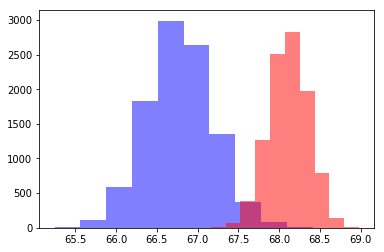

In [7]:
plt.hist(nocoff_means, alpha = 0.5, color='blue');
plt.hist(coff_means, alpha = 0.5, color= 'red'); 

`3.` Now, use your sampling distribution for the difference in means and [the docs](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to simulate what you would expect if your sampling distribution were centered on zero.  Also, calculate the observed sample mean difference in `sample_data`.

** We would expect the sampling distribution to be normal by the Central Limit Theorem, and we know the standard deviation of the sampling distribution of the difference in means from the previous question, so we can use this to simulate draws from the sampling distribution under the null hypothesis.  If there is truly no difference, then the difference between the means should be zero.**

In [8]:
n# Here are 10000 draws from the sampling distribution under the null

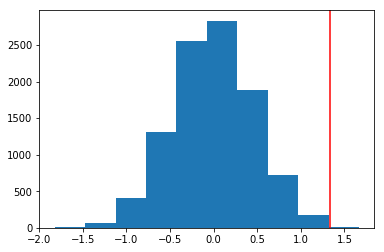

In [9]:
plt.hist(null_vals)
plt.axvline(x=np.mean(diffs), color = 'red'); #Here is the sampling distribution of the difference under the null

In [37]:
np.percentile(null_vals, 2.5), np.percentile(null_vals, 97.5)

(-0.908653513353886, 0.9147148264880927)

In [10]:
area_to_the_left = (null_vals > np.mean(diffs)).mean()
area_to_the_left

0.0014